# Flight Price Prediction

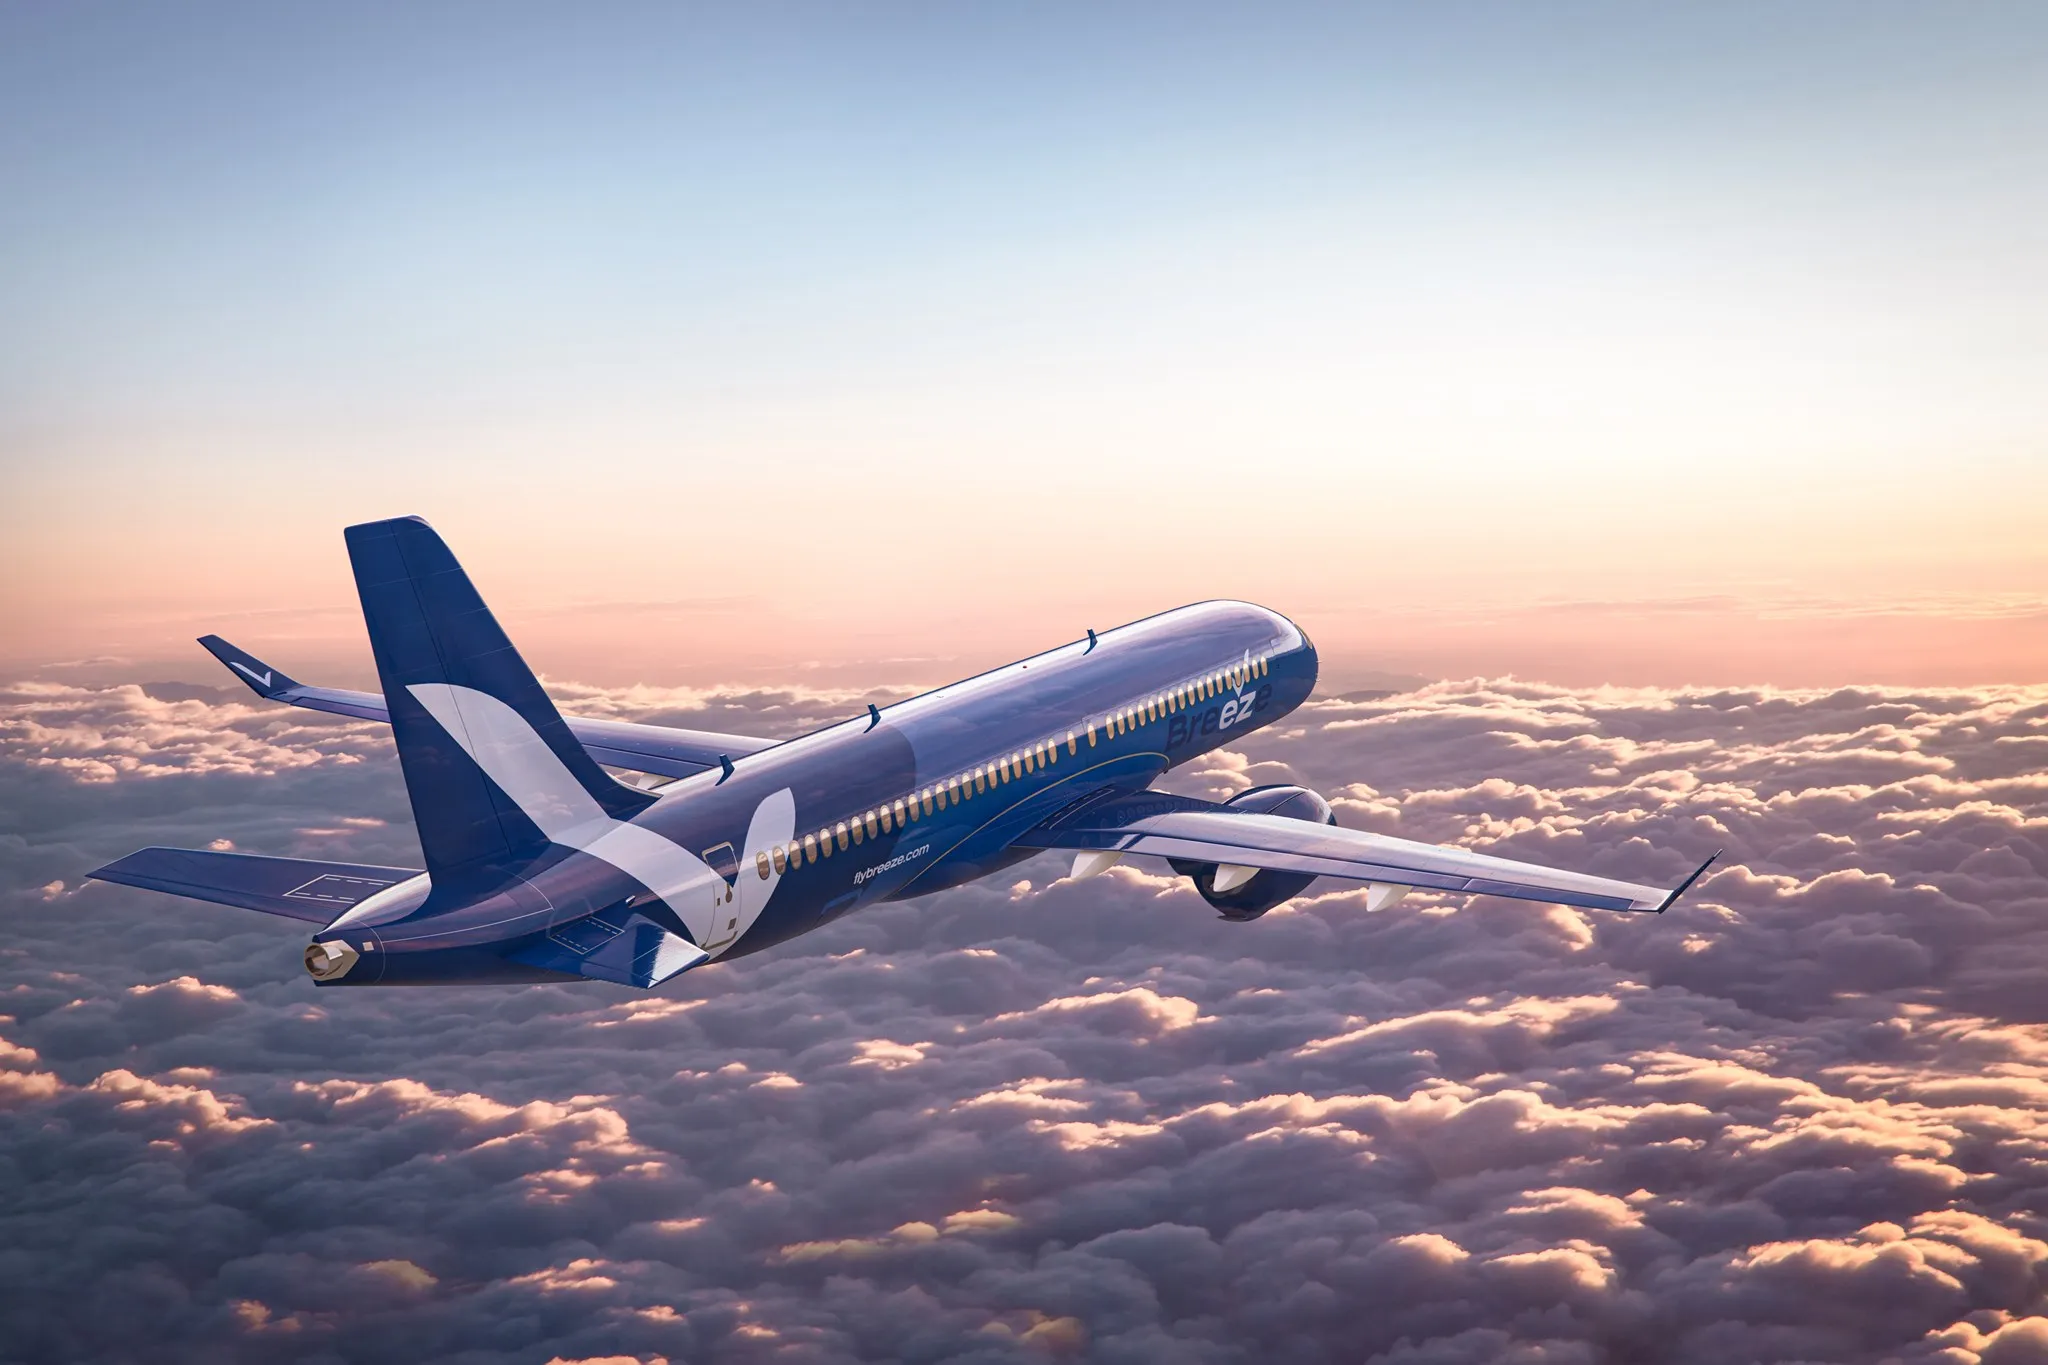

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [303]:
train_data= pd.read_excel('Flight price prediction.xlsx')

In [304]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [305]:
train_data.shape

(10683, 11)

In [306]:
train_data.isnull().sum().sort_values(ascending=False).head(20)

Total_Stops        1
Route              1
Price              0
Additional_Info    0
Duration           0
Arrival_Time       0
Dep_Time           0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

since we just have two data as missing so we can remove them from our dataset since dropping 2 rows from 10683 rows won't make such a big difference in final accuracy of our model. 

In [307]:
train_data.dropna(inplace=True)

In [308]:
train_data.shape

(10682, 11)

In [309]:
train_data.isnull().sum().sort_values(ascending=False).head(20)

Price              0
Additional_Info    0
Total_Stops        0
Duration           0
Arrival_Time       0
Dep_Time           0
Route              0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

now both of our missing values are removed 

now we have to look into the data types of our variables so that we can do data preprocessing efficiently

In [310]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Now pandas by default has assigned the Date_of_Journey , Dep_Time(departure time), Arrival_Time as object but we know that these are of types date/time , time format respectively. So we should make a function that does the required tranformation for us. 

In [311]:
def change_to_datetime(col):
    train_data[col]= pd.to_datetime(train_data[col])


In [312]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [313]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_datetime(i)

**just look into the to_datetime and also how to create a list and assign values to move in for loop

In [314]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-07 05:50:00,2021-09-07 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-07 18:05:00,2021-09-07 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-07 16:50:00,2021-09-07 21:35:00,4h 45m,1 stop,No info,13302


In [315]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [316]:
train_data['journey_day']= train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [317]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-07 05:50:00,2021-09-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-07 18:05:00,2021-09-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-07 16:50:00,2021-09-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


now we can clearly notice that our journey_day and journey_month column are made from Date_of_Journey column ,so now we have all the data that we can get from Date_of_Journey, so we need to remove Date_of_Journey column. 

In [318]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [319]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-09-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-07 05:50:00,2021-09-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-07 18:05:00,2021-09-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-07 16:50:00,2021-09-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


machine always wants us to input a number so that it can find some corelations and that's why we converted the object data type of all three columns above to  datetime64. 

In [320]:
def extract_hour(df,col):
    df[col + '_hour'] = df[col].dt.hour

def extract_minute(df,col):
    df[col + '_minute']= df[col].dt.minute
    
def remove(df,col):
    df.drop(col,axis=1,inplace=True)

In [321]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
remove(train_data,'Dep_Time')

In [322]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
remove(train_data,'Arrival_Time')

In [323]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now for the duration column it needs to be converted into a single format of x hours and y minutes as we will encounter some cases where either hours is missing or minutes so for us to apply data pre-processing steps correctly we need to add 0m in row containing only h and 0h in row containing only m

In [324]:
duration = list(train_data['Duration'])

In [325]:
x = '2h 30m'
len(x.split(' '))
# if the x was 2h 30m 3s then len = 3

2

In [326]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i]+ ' 0m'
        else:
            duration[i]= '0h '+duration[i]

In [327]:
train_data['Duration']=duration

In [328]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


now we can clearly see that 19h earlier is now 19h 0m

In [329]:
x='2h 30m'
x.split(' ')[0]

'2h'

In [330]:
x='2h 30m'
x.split(' ')[0][0:-1]

'2'

In [331]:
# data = train_data['Duration'].to_list()
# hour = []
# minute = []

In [332]:
# for x in data:
#     h,m = x.split(' ')[0][0:-1], x.split(' ')[1][0:-1]
#     hour.append(h)
#     minute.append(m)
# hour 

# def hour(col):
#     #train_data['Duration_hours'] = x.split(' ')[0][0:-1]
#     for i in range(len(col)):
#         x = col[i].split(' ')[0][0:-1]
#         mylist1.append(x)
    
# def minute(col):
#     train_data['Duration_mins'] = x.split(' ')[1][0:-1]

In [333]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]


In [334]:
train_data['Duration_hours']= train_data['Duration'].apply(hour)
train_data['Duration_mins']= train_data['Duration'].apply(minute)

In [335]:
train_data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: object

In [249]:
train_data['Duration_hours'].values

array(['2', '7', '19', ..., '3', '2', '8'], dtype=object)

In [250]:
train_data.drop('Duration',axis=1,inplace=True)

In [251]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [252]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

since both of our Duration_hours and 

 Now since both Duration_hours and Duration_mins are in object type so we need to convert it to int data type

In [253]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Dep_Time_minute'].astype(int)

In [254]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [255]:
train_data['Airline'].dtype

dtype('O')

In [256]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
#cat_col = []
#for col in train_data.columns:
#    if(train_data[col].dtype=='O'):
#        cat_col.append(col)
# exact same hai dono 
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

above code is the code for list comprehension in python

In [257]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

Categorical data is basically of two types -:
-> Nominal data .. all the data that doesn't have any type of hierarchy e.g. names of countries--> get dummies is used.  
-> ordinal data .. that have some kind of hierarchy -> label encoding is used here 

We will use one hot encoding for airline , source , destination because they don't have any type of hierarchy and co-relation between them. # Viraj se bhi puch lena 1 baar aisa kyu kr rha hai 

In [258]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [259]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

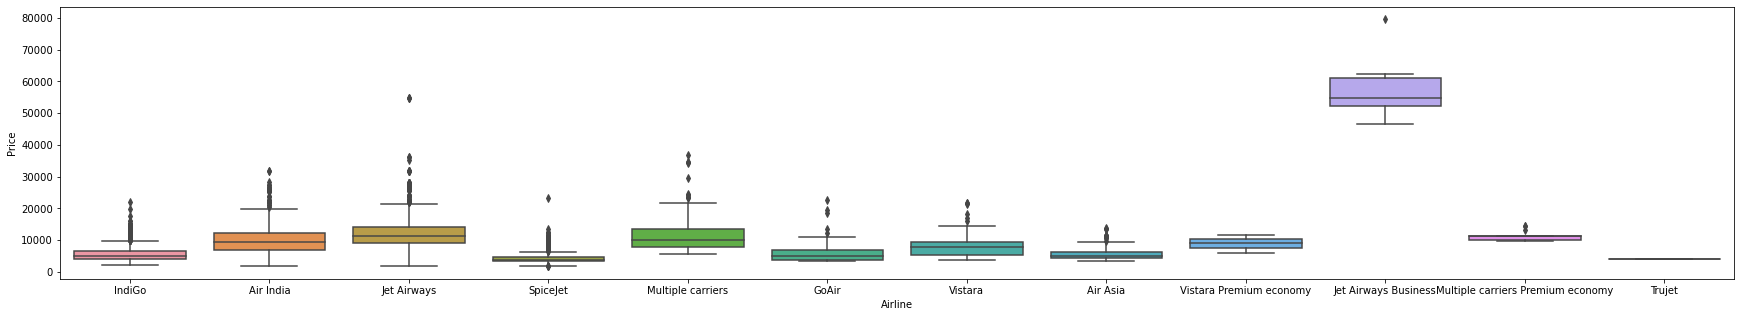

In [260]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Airline',y='Price',data=train_data)

Points about boxplot, boxplot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

Now from the plots above it's quite clear that Jet Airways Business has the highest price and the prices of all other flights somewhat lie in the same range. 

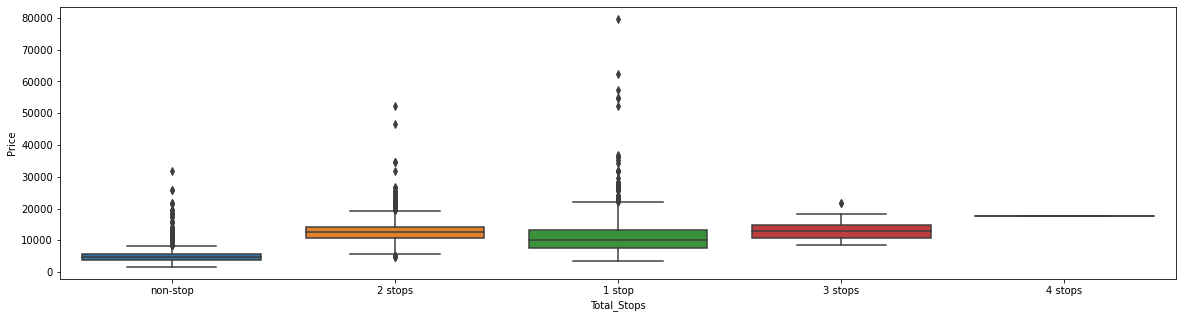

In [261]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data)

We can clearly notice that 1 stop, non-stop have many outliers and the price fluctuates significantly 

Now we will use One Hot Encoding for our airline column 

In [262]:
# Airline = pd.get_dummies(categorical['Airline'],drop_first=True)
Airline = pd.get_dummies(data = categorical, columns=['Airline'])

In [95]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [96]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

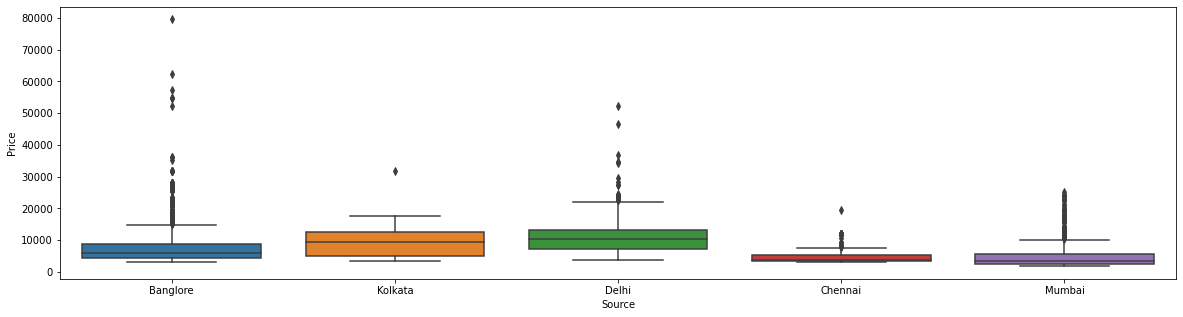

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Source',y='Price',data=train_data)

Now Bangalore has the highest fluctuation in the data followed by Delhi 

In [98]:
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [99]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

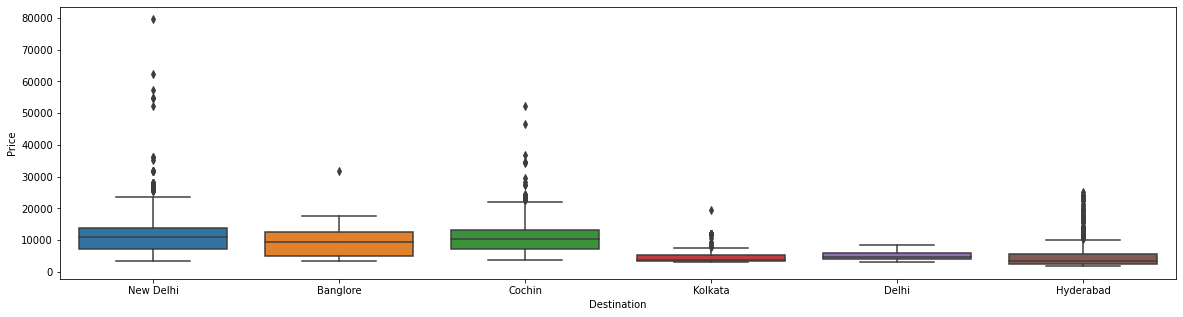

In [100]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Destination',y='Price',data=train_data)

In [101]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [265]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [103]:
#categorical['Route_1']= categorical['Route'].str.split('->').str[0]

In [104]:
categorical['Route_1']= categorical['Route'].str.split('→').str[0]
categorical['Route_2']= categorical['Route'].str.split('→').str[1]
categorical['Route_3']= categorical['Route'].str.split('→').str[2]
categorical['Route_4']= categorical['Route'].str.split('→').str[3]
categorical['Route_5']= categorical['Route'].str.split('→').str[4]

<ipython-input-104-d3523f3e75a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']= categorical['Route'].str.split('→').str[0]
<ipython-input-104-d3523f3e75a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']= categorical['Route'].str.split('→').str[1]
<ipython-input-104-d3523f3e75a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

str.split() is a fuction of pandas library 

In [105]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [106]:
categorical.drop('Route',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [107]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [108]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [109]:
categorical.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [110]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [111]:
#for i in ['Route_3', 'Route_4', 'Route_5']:
#    print(categorical[i])
#    print(i) wrote this just for my knowledge 

In [112]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [113]:
for i in categorical.columns:
    print(i)
    print(len(categorical[i].value_counts()))
#also try 
# for i in categorical.columns:
#    print(i)
#    print((categorical[i].value_counts()) it just prints all columns wise length

Airline
12
Source
5
Destination
6
Total_Stops
5
Additional_Info
10
Route_1
5
Route_2
45
Route_3
30
Route_4
14
Route_5
6


Now since Route_2, Route_3, Route_4 all have so many different features so it's not a good idea to do One Hot Encoding here as it will make a large set of columns therefore we will get a issue of high dimensionality of data set . So it's better to use Label Encoder 

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
encoder = LabelEncoder()

In [116]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [117]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-117-16ab1ba461c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [118]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


now since the Additiona_Info column mostly contains No info so it is wise to drop the column here 

In [119]:
categorical.drop('Additional_Info',axis=1,inplace=True)
categorical.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


now it's time to deal with Total_Stops

In [120]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [121]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [122]:
# Method 1 using Label Encoder 
categorical['Total_Stops'] =encoder.fit_transform(categorical['Total_Stops'])
categorical.head()

<ipython-input-122-18f00975c8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] =encoder.fit_transform(categorical['Total_Stops'])


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,4,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,0,34,8,13,5


In [123]:
#Method 2 using out own built in dictionary 
#dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
#categorical['Total_Stops']= categorical['Total_Stops'].map(dict) 

In [124]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,4,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,0,34,8,13,5


In [125]:
categorical.drop('Airline',axis=1,inplace=True)
categorical.drop('Source',axis=1,inplace=True)
categorical.drop('Destination',axis=1,inplace=True)
categorical.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,0,13,29,13,5
1,1,2,25,1,3,5
2,1,3,32,4,5,5
3,0,2,34,3,13,5
4,0,0,34,8,13,5


In [126]:
data_train= pd.concat([train_data[cont_col],categorical,Airline,Source,Destination],axis=1)

In [127]:
data_train.head()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Total_Stops,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,1,10,2,20,4,...,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,5,50,13,15,7,50,1,...,0,0,0,1,0,0,0,0,0,0
2,13882,6,9,9,25,4,25,19,25,1,...,0,0,1,0,0,1,0,0,0,0
3,6218,5,12,18,5,23,30,5,5,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,3,1,16,50,21,35,4,50,0,...,0,0,0,0,0,0,0,0,0,1


to view all the 35 columns we need to do the following

In [128]:
pd.set_option('display.max_columns',35)
data_train.head()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,1,10,2,20,4,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,5,50,13,15,7,50,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,6,9,9,25,4,25,19,25,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,5,12,18,5,23,30,5,5,0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,3,1,16,50,21,35,4,50,0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Handling with outliers**

two plots will be useful for us for dealing with outliers, boxplot and distplot

In [129]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

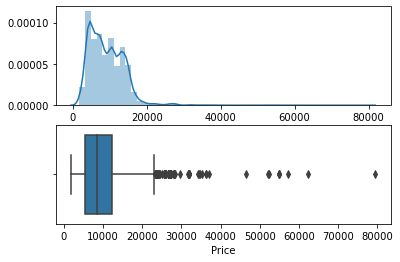

In [130]:
plot(data_train,'Price')

In [131]:
data_train['Price'] =np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

1st argument is the condition that you need to put in , then 2nd argument what happens if the given condition satisfies and then 3rd what if it doesn't satisfies

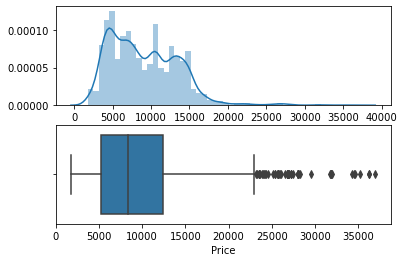

In [132]:
plot(data_train,'Price')

In [133]:
X = data_train.drop('Price',axis=1)

In [134]:
X.head()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24,3,22,20,1,10,2,20,4,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,1,5,50,13,15,7,50,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,9,9,25,4,25,19,25,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5,12,18,5,23,30,5,5,0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,1,16,50,21,35,4,50,0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [135]:
y = data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

Finding the corelation between features 


In [266]:
data_train.corr()['Price'].sort_values(ascending=False).head(25)

Price                                1.000000
Duration_hours                       0.539566
Jet Airways                          0.438216
Delhi                                0.289010
Cochin                               0.289010
Route_1                              0.202811
New Delhi                            0.175353
Multiple carriers                    0.150260
Air India                            0.057157
Arrival_Time_hour                    0.030714
journey_month                        0.022040
Multiple carriers Premium economy    0.018878
Kolkata                              0.015518
Dep_Time_hour                        0.006999
Vistara Premium economy             -0.000320
Jet Airways Business                -0.003642
Trujet                              -0.010820
Dep_Time_minute                     -0.032789
Duration_mins                       -0.032789
Route_5                             -0.059084
Vistara                             -0.061720
Route_2                           

**Applying Machine Learning Algorithm on our data and automating the predictions** 

What we want to do basically is to write a block of code where if we will pass our type of model and dataset then the block of code will directly predict the results and give us the predicted result only.

We will use R2-score and MSME, RSE to know the performance of our machine learning algorithms

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

now we will make that function which takes ml models and evaluates it's performance 

In [142]:
from sklearn import metrics

In [143]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    #print('Training score_yo_bro :',model.score(X_train,y_train))
    #alternate way of printing the above column
    y_pred = ml_model.predict(X_test)
    print('Predictions are: {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r2_score is: {}'.format(r2_score))
    mse = metrics.mean_squared_error(y_test,y_pred)
    print('mean_squared_error is: {}'.format(mse))
    
    sns.distplot(y_test-y_pred)

if the graph comes out as having one maxima then it is normal and our model is performing extremely well (pr mere ko smhj nai aaya).

In [144]:
from sklearn.ensemble import RandomForestRegressor


Training score : 0.9526554680631858
Training score_yo_bro : 0.9526554680631858
Predictions are: [20647.1     12585.75275  4937.52    ...  4428.23    14205.4
  6542.555  ]


r2_score is: 0.8310183369273767
mean_squared_error is: 3496087.49655311


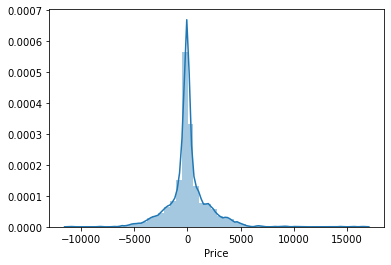

In [145]:
predict(RandomForestRegressor())

--> now as we can notice from the graph that most of the times our difference between y_test and y_pred is close to zero hence our model is performing really good. 

In [146]:
# print('what',10) it can be used as an alternative to .format 

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6197732702662175
Training score_yo_bro : 0.6197732702662175
Predictions are: [11649.84960938 13362.65625     3796.7421875  ...  4312.21484375
  9231.36914062  7772.89453125]


r2_score is: 0.5868887140636345
mean_squared_error is: 8546922.637555052


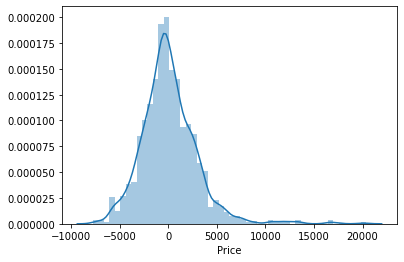

In [148]:
predict(LinearRegression())

--> It can be clearly seen that our linear regression model doesn't performs well for this dataset. 

Training score : 0.9661284877820623
Training score_yo_bro : 0.9661284877820623
Predictions are: [ 8372. 12557.  4823. ...  4148. 12351.  6306.]


r2_score is: 0.7372586082009749
mean_squared_error is: 5435896.87776218


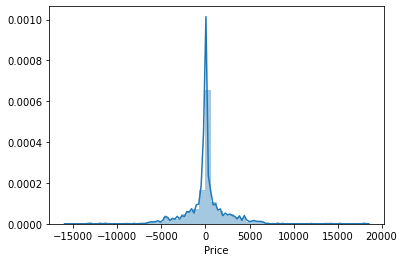

In [150]:
predict(DecisionTreeRegressor())

--> Our Decision Tree overfits the data as it does really well in the training set and poor on test set

**Hypertuning our model**

We are going to use Grid search CV here.

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
n_estimators = []
for x in np.linspace(start=100,stop=1200,num=6):
    n_estimators.append(int(x))
max_depth = []
for x in np.linspace(start=5,stop=30,num=4):
    max_depth.append(int(x))

In [153]:
parameters = {
    'n_estimators' : n_estimators,
    'max_depth': max_depth
}

In [154]:
rf_reg = RandomForestRegressor()

In [155]:
grid_search = GridSearchCV(estimator=rf_reg,param_grid=parameters,scoring='r2',cv=5,n_jobs=-1)

n_jobs = -1 sets all our processor of computer to work 

In [156]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 13, 21, 30],
                         'n_estimators': [100, 320, 540, 760, 980, 1200]},
             scoring='r2')

In [157]:
grid_search.best_params_

{'max_depth': 13, 'n_estimators': 1200}

In [158]:
prediction = grid_search.predict(X_test)

In [159]:
score = metrics.r2_score(y_test,prediction)
score

0.8534125448889044

--> as we can see the r2_score has improved from .83 to .85 due to our grid_search 

In [160]:
prediction

array([20296.93834006, 12687.34308079,  4682.20653752, ...,
        4824.06966785, 13914.88622222,  6553.16539731])